In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [106]:
data = pd.read_excel('copia_base_datos_unificada_parquesdecastilla.xlsx')

dataset = data.iloc[:,0:32]

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1937 entries, nan to nan
Data columns (total 32 columns):
Proyecto                           1937 non-null object
Módulo                             1937 non-null object
Vendedor                           1937 non-null object
Identificacion                     8 non-null object
Género                             797 non-null object
Nombre del Cliente                 1936 non-null object
Teléfono                           43 non-null object
Celular                            1851 non-null object
Correo                             1730 non-null object
Estado Civil                       8 non-null object
Ocupacion                          6 non-null object
Direccion Residencia               6 non-null object
Barrio                             6 non-null object
Fecha de Nacimiento                5 non-null datetime64[ns]
Edad                               5 non-null float64
Profesion                          5 non-null object
Tipo de comp

In [107]:
#dataset.head(10)
#dataset.isnull().sum()

In [108]:
#to eliminate rwos where name is NULL
#dataset = dataset[dataset['Nombre del Cliente'].notnull()]

# replacing na values in names with "No name" 
dataset["Nombre del Cliente"].fillna("No Name", inplace = True) 

# replacing na values in gender
dataset["Género"].fillna("No Gender reported", inplace = True) 

# replacing na values in tipo de comprador
#dataset["Tipo de comprador"].fillna("No reporta", inplace = True) 

# replacing na values in city
dataset["Ciudad"].fillna("No city", inplace = True) 

# replacing na values in tipo de comprador
dataset["Tipo de Acción"].fillna("No reporta", inplace = True) 

In [109]:
dataset.isnull().sum()

Proyecto                              0
Módulo                                0
Vendedor                              0
Identificacion                     1929
Género                                0
Nombre del Cliente                    0
Teléfono                           1894
Celular                              86
Correo                              207
Estado Civil                       1929
Ocupacion                          1931
Direccion Residencia               1931
Barrio                             1931
Fecha de Nacimiento                1932
Edad                               1932
Profesion                          1932
Tipo de comprador                  1153
Ciclo de Venta                        0
Etapa del Ciclo                       0
Probabilidad                          0
Valor                                 0
Ciudad                                0
Fecha de Creación (DD MM YYYY)        0
Se Crea Cotizacion                    0
Registro Visita a la Sala             0


In [92]:
#==================================
#plotting function
#==================================

def plotting(dataframe, a,r): 
    dataframe.plot(kind='bar',figsize=(10,8))   
    plt.style.use('seaborn-dark-palette')
    plt.title(a,fontsize='15')
    plt.xlabel('¿' + dataframe.index.name + '?',fontsize='12')
    plt.ylabel('Leads',fontsize='12')
    plt.legend(loc='upper left', labels=dataframe.columns.values,fontsize='8')
    plt.grid()
    plt.xticks(rotation=r)
    plt.show()
    


In [110]:
dataset['Fecha de Creación (DD MM YYYY)'] = pd.to_datetime(dataset['Fecha de Creación (DD MM YYYY)'])
dataset['Primer Seguimiento (DD MM YYYY)'] = pd.to_datetime(dataset['Primer Seguimiento (DD MM YYYY)'])
dataset['Ultimo Seguimiento (DD MM YYYY)'] = pd.to_datetime(dataset['Ultimo Seguimiento (DD MM YYYY)'])
#dataset['date of creation'] = dataset['created_time'].dt.date 

In [111]:
#channel = dataset.groupby(['Fuente de Ubicación','Ciudad'])['Nombre del Cliente'].count()
channel = dataset.groupby(['Tipo de Acción','Ciudad'])['Nombre del Cliente'].count()
channel = pd.DataFrame(channel.unstack(level=1)) #unstack cities

#print(channel)

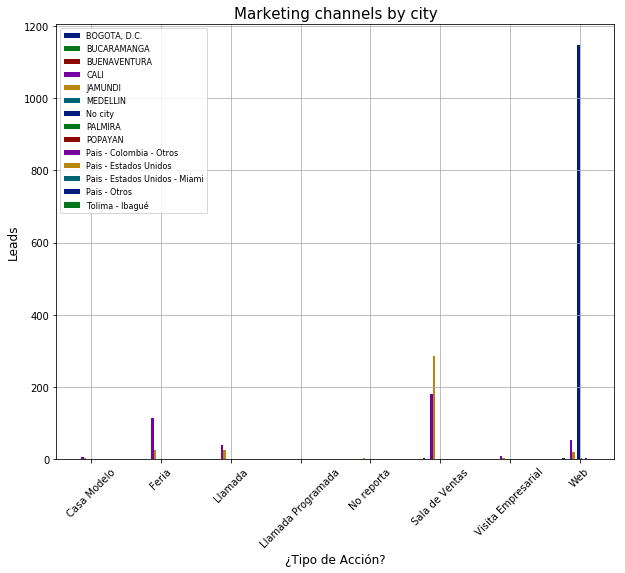

In [112]:
plotting(channel,"Marketing channels by city",45)

In [113]:
#date_channel = dataset.groupby(['Fecha de Creación (DD MM YYYY)','Fuente de Ubicación'])['Nombre del Cliente'].count()
date_channel = dataset.groupby(['Fecha de Creación (DD MM YYYY)','Tipo de Acción'])['Nombre del Cliente'].count()
date_channel = pd.DataFrame(date_channel.unstack(level=1)) #unstack channels

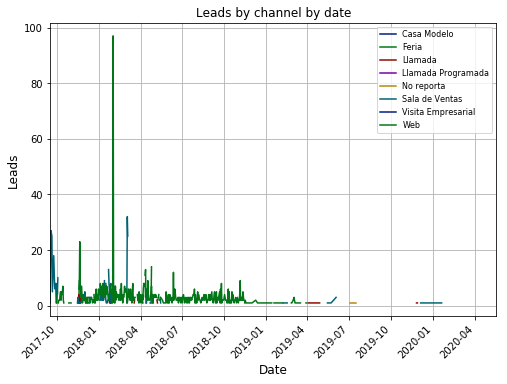

In [114]:
date_channel.plot(kind = 'line',figsize=(8,6))
plt.title('Leads by channel by date')
plt.grid()
plt.xlabel('Date',fontsize='12')
plt.ylabel('Leads',fontsize='12')
plt.legend(loc='upper right', labels=date_channel.columns.values,fontsize='8')
plt.xticks(rotation=45)
plt.show()

In [117]:
#channel_tipocomprador = dataset.groupby(['Fuente de Ubicación','Tipo de comprador'])['Nombre del Cliente'].count()
channel_tipocomprador = dataset.groupby(['Tipo de Acción','Tipo de comprador'])['Nombre del Cliente'].count()
channel_tipocomprador = pd.DataFrame(channel_tipocomprador.unstack(level=1)) #unstack cities


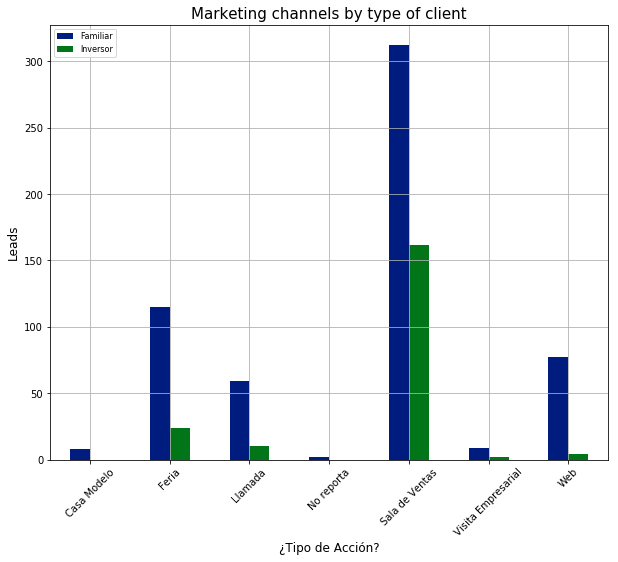

In [119]:
plotting(channel_tipocomprador,"Marketing channels by type of client",45)

In [120]:
city_tipocomprador = dataset.groupby(['Ciudad','Tipo de comprador'])['Nombre del Cliente'].count()
city_tipocomprador = pd.DataFrame(city_tipocomprador.unstack(level=1)) #unstack cities

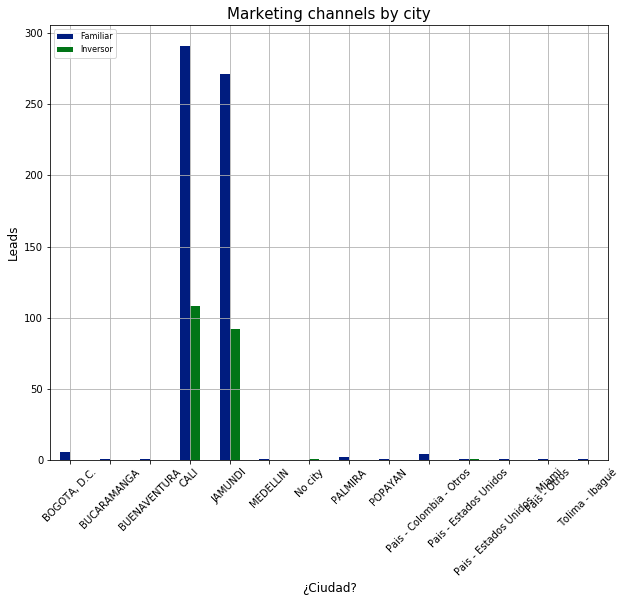

In [121]:
plotting(city_tipocomprador,"Marketing channels by city",45)
